# Visión por computadora

## Imágenes como matrices

Las imágenes se tratan en Python como matrices donde cada valor representa la luminosidad de un pixel. Una imagen de $m\times n$ pixeles en escala de grises se representa con una matriz de tamaño `(m,n)`. Una imagen de $m \times n$ pixeles en color se representa con una matrix de tamaño `(m,n,3)` con una matriz de luminosidad para cada uno de los tres canales de color RGB. Cada pixel puede tomar valores entre `0` (negro) y `255` (blanco) con los valores intermedios representando distintos grados de luminosidad.

Usamos la librería [`skimage`](http://scikit-image.org/) para leer y manipular imágenes. Fíjate como se accede a los valores de un pixel específico.

dimensiones (246, 360, 3) max 255 min 0
pixel at blue marker  [230   1   0]
pixel at green marker [ 24  48 112]


numpy.ndarray

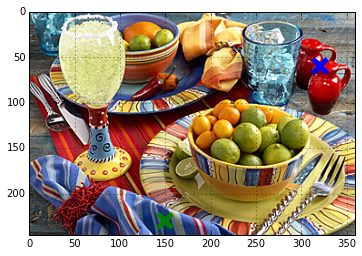

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.signal import convolve2d
%matplotlib inline

img = io.imread("imgs/sample_img.jpg")
print "dimensiones", img.shape, "max", np.max(img), "min", np.min(img)
plt.scatter(320,60, marker="x", s=200, linewidth=5, c="b")
plt.scatter(150,230, marker="x", s=200, linewidth=5, c="g")
print "pixel at blue marker ", img[60,320,:]
print "pixel at green marker", img[230,150,:]
plt.grid() # remove gridlines
plt.imshow(img)
type(img)

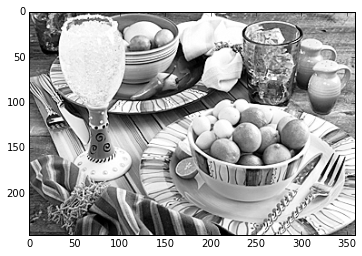

In [2]:
plt.imshow(img[:,:,0], cmap = plt.cm.Greys_r)

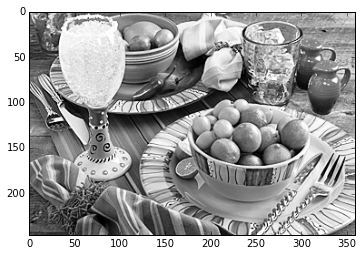

In [4]:
gimg = img[:,:,0]*.5+img[:,:,1]*.3+img[:,:,2]*.2
plt.imshow(gimg, cmap = plt.cm.Greys_r, vmin=0, vmax=255)

## Manipulación de imágenes

La manipulación de imágenes se _reduce_ a realizar cálculos sobre los valores de luminosidad de cada pixel. Por ejemplo, obtenemos una versión en escala de grises promediando los valores RGB de cada pixel. Esto se hace de manera natural con la función `np.mean` y el argumento `axis` adecuado.

dimensiones (246, 360, 3) max 255 min 0
pixel at blue marker  77.0
pixel at green marker 61.3333333333


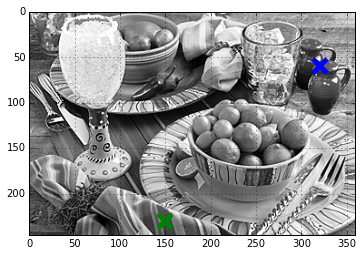

In [5]:
gimg = np.mean(img, axis=2)
print "dimensiones", img.shape, "max", np.max(img), "min", np.min(img)
plt.scatter(320,60, marker="x", s=200, linewidth=5, c="b")
plt.scatter(150,230, marker="x", s=200, linewidth=5, c="g")
print "pixel at blue marker ", gimg[60,320]
print "pixel at green marker", gimg[230,150]
plt.grid() # remove gridlines
plt.imshow(gimg, cmap = plt.cm.Greys_r, vmin=0, vmax=255)

También podemos acceder a porciones (**parches**) de la imagen usando la notación natural de matrices de Python. Si además, reducimos la luminosidad de cada pixel a la mitad lo que hacemos es oscurecer la imagen.

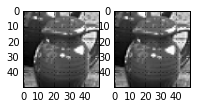

In [8]:
parche = gimg[50:100, 300:350]
parche_oscuro = parche/2

fig = plt.figure(figsize=(3,3))
fig.add_subplot(121); plt.grid(); 
plt.imshow(parche, cmap=plt.cm.Greys_r)
fig.add_subplot(122); plt.grid(); 
plt.imshow(parche_oscuro, cmap=plt.cm.Greys_r)

In [9]:
np.mean(parche), np.mean(parche_oscuro)

(80.015600000000006, 40.007800000000003)

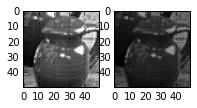

In [10]:
parche = gimg[50:100, 300:350]
parche_oscuro = parche/2

fig = plt.figure(figsize=(3,3))
fig.add_subplot(121); plt.grid(); 
plt.imshow(parche, cmap=plt.cm.Greys_r, vmin=0, vmax=255)
fig.add_subplot(122); plt.grid(); 
plt.imshow(parche_oscuro, cmap=plt.cm.Greys_r, vmin=0, vmax=255)

In [11]:
np.max(parche_oscuro), np.max(parche)

(127.5, 255.0)

## Convolución

La convolución es una operación básica en el tratamiento de imágenes. La figura siguiente lo ilustra. Dada una máscara (de tamaño 3x3 en este caso) se va deslizando por las distintas posiciones de la imagen. En cada paso, se multipica cada elemento de la máscara con los valores de los pixeles con los que corresonde en la imagen y, finalmente, se suman los valores obtenidos (nueve valores en este caso).
<img src="imgs/Convolution_schematic.gif">

<small>Fuente imagen: Tutorial _Unsupervised Feature Learning Learning Deep Learning_ de Stanford (<a href="http://deeplearning.stanford.edu/tutorial/">sitio web</a>).</small>

Dependiendo del valor de la máscara obtendremos distintos efectos y propiedades (_features_) de la imagen.

## Un ejemplo

tamano de la imagen (300, 450, 3)


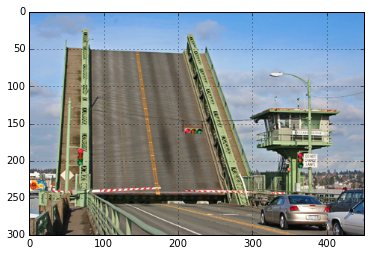

In [12]:
img = io.imread("imgs/puente.jpg")

plt.imshow(img, cmap = plt.cm.Greys_r)
plt.grid()
print "tamano de la imagen", img.shape

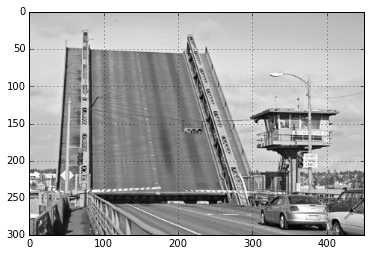

In [13]:
gimg = np.mean(img, axis=2)
plt.grid()
plt.imshow(gimg, cmap = plt.cm.Greys_r)

Convolución para bordes verticales usando la indexación de matrices

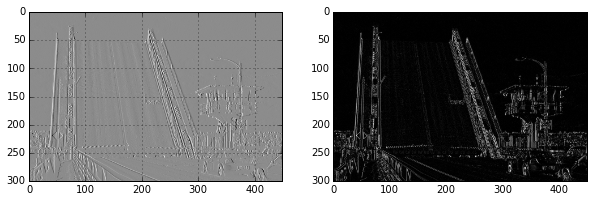

In [14]:
rimg = np.copy(gimg)
rimg[:,:-1]-=rimg[:,1:]
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(rimg, cmap = plt.cm.Greys_r); plt.grid()
fig.add_subplot(122)
plt.imshow(np.abs(rimg), cmap = plt.cm.Greys_r); plt.grid()

Convolución con bordes verticales usando el operador `convolve2d`

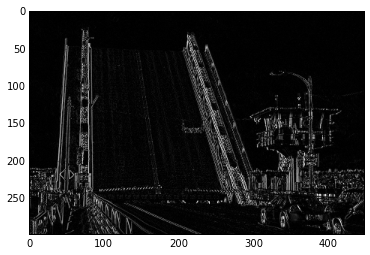

In [36]:
f = np.array([[0,0,0],[0,-1,1],[0,0,0]])
c = convolve2d(gimg, f, mode="valid")
plt.imshow(np.abs(c), cmap = plt.cm.Greys_r); plt.grid()

Border horizontales con ambos métodos

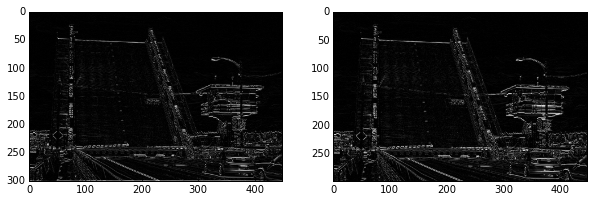

In [37]:
rimg = np.copy(gimg)
rimg[:-1,:]-=rimg[1:,:]
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(np.abs(rimg), cmap = plt.cm.Greys_r); plt.grid()

f = np.array([[0,0,0],[0,-1,0],[0,1,0]])
c = convolve2d(gimg, f, mode="valid")
fig.add_subplot(122)
plt.imshow(np.abs(c), cmap = plt.cm.Greys_r); plt.grid()

Combinamos ambos bordes

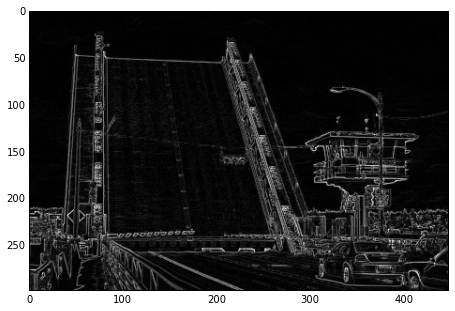

In [29]:
fv = np.array([[0,0,0],[0,-1,1],[0,0,0]])
fh = np.array([[0,0,0],[0,-1,0],[0,1,0]])
cv = convolve2d(gimg, fv, mode="valid")
ch = convolve2d(gimg, fh, mode="valid")

#b= np.sqrt(cv**2 + ch**2)
b = (np.abs(cv) + np.abs(ch) ) / 2
plt.figure(figsize=(10,5))
plt.imshow(b, cmap = plt.cm.Greys_r); plt.grid()

(-10, 300)

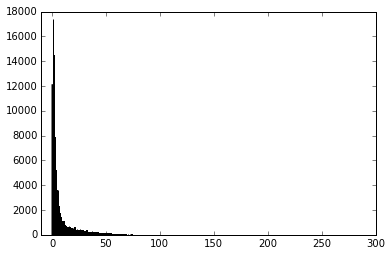

In [30]:
plt.hist(b.reshape(b.shape[0]*b.shape[1]), bins=255);
plt.xlim([-10,300])

Discretizamos los bordes

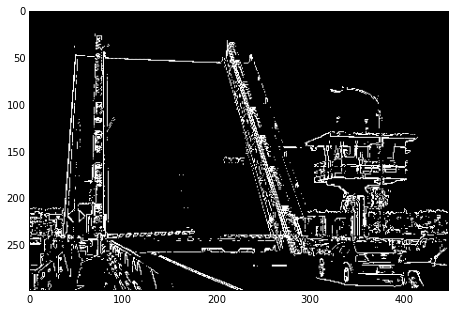

In [23]:
b = np.sqrt(cv**2 + ch**2)
threshold = 50
b[b>threshold]=255
b[b<threshold]=0
plt.figure(figsize=(10,5))
plt.imshow(b, cmap = plt.cm.Greys_r); plt.grid()

(-10, 300)

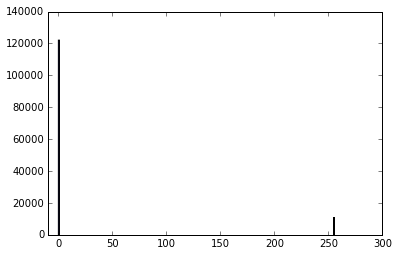

In [26]:
plt.hist(b.reshape(b.shape[0]*b.shape[1]), bins=255);
plt.xlim([-10,300])

Otros filtros

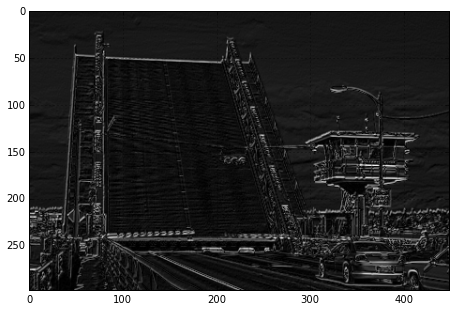

In [16]:
f_sharpen = np.array([[ 1, 1, 1],
                      [ 1, -5, 1],
                      [ 1, 1, 1]])

f_emboss  = np.array([[ -1, -1, 0],
                      [ -1, 0, 1],
                      [ 0, 1, 1]])

f_blur = np.array([[ 1, 1, 1],
              [ 1, 1, 1],
              [ 1, 1, 1]])

f_motionblur = np.array([[-1,-1,-1,-1,-1],
                         [-1, 2, 2, 2,-1],
                         [-1, 2, 8, 2,-1],
                         [-1, 2, 2, 2,-1],
                         [-1,-1,-1,-1,-1]])

f_bigblur = np.ones((10,10))

f_raul  = np.array([[ -10, 1],
                   [ -10, 1],
                   [ 10, 10]])

c = convolve2d(gimg, f_raul, mode="valid")
c = np.abs(c)
plt.figure(figsize=(10,5))
plt.imshow(c, cmap = plt.cm.Greys_r); plt.grid()